In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

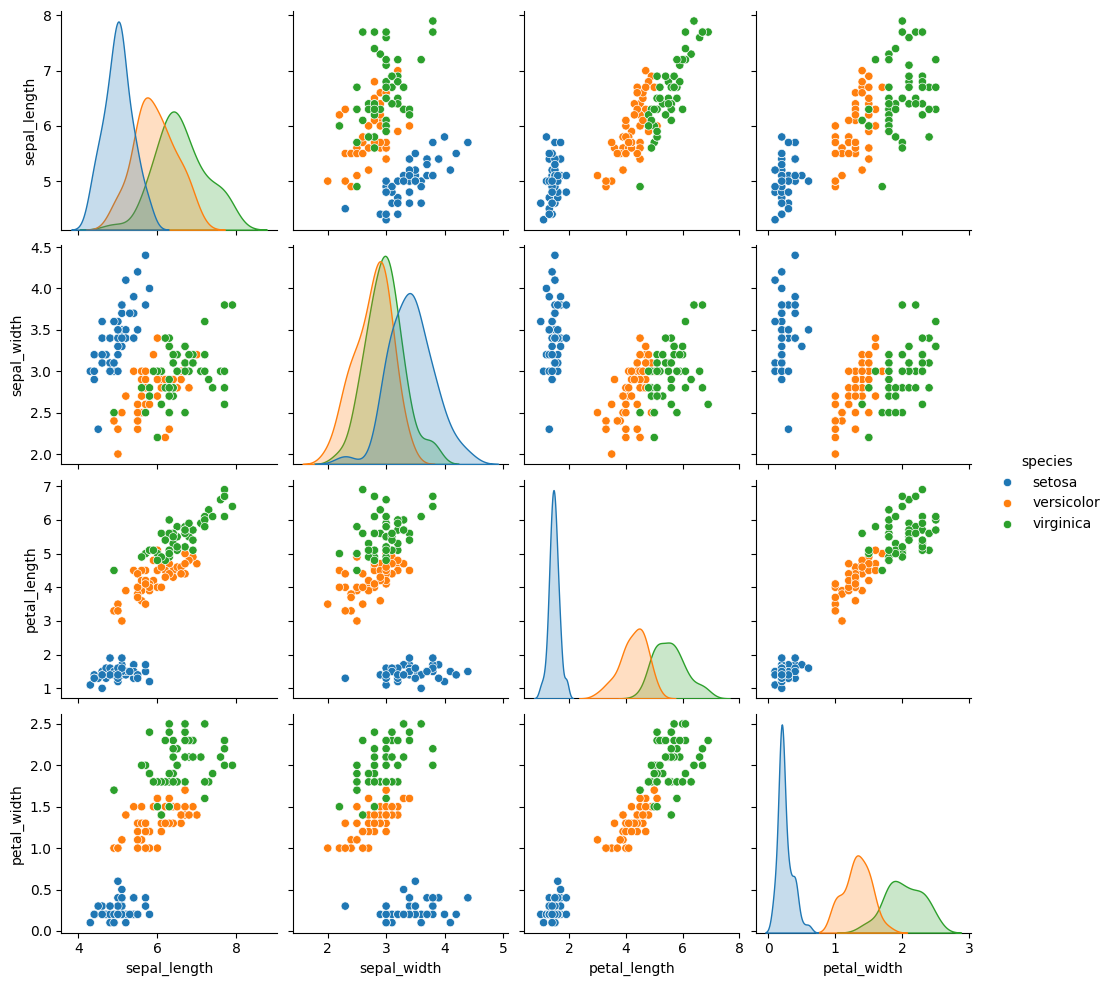

In [4]:
sns.pairplot(df, hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

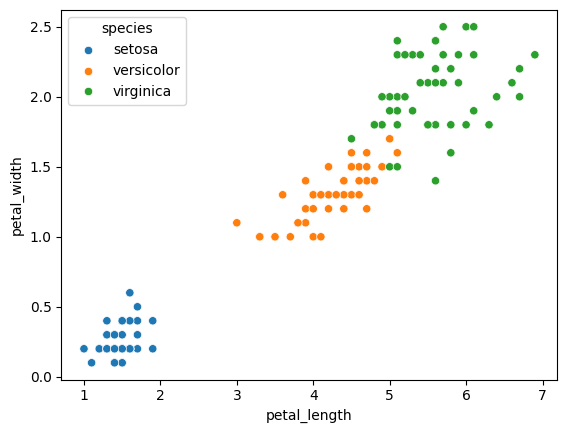

In [5]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

In [6]:
X = df.drop('species', axis=1)
y = df['species']

In [7]:
import sklearn
from sklearn.model_selection import train_test_split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=3)

In [25]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [26]:
y_pred = model.fit(X_train, y_train).predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [28]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9666666666666667
[[12  0  0]
 [ 0  7  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

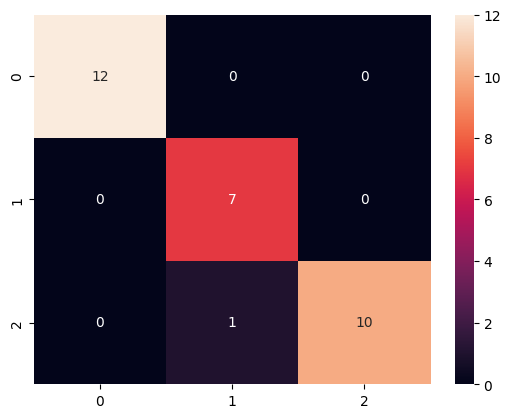

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [30]:
k_value = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    test_error  = 1 - accuracy_score(y_test, y_pred)
    k_value.append(test_error)

In [31]:
k_value

[0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.06666666666666665,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326]

Text(0.5, 0, 'K Value')

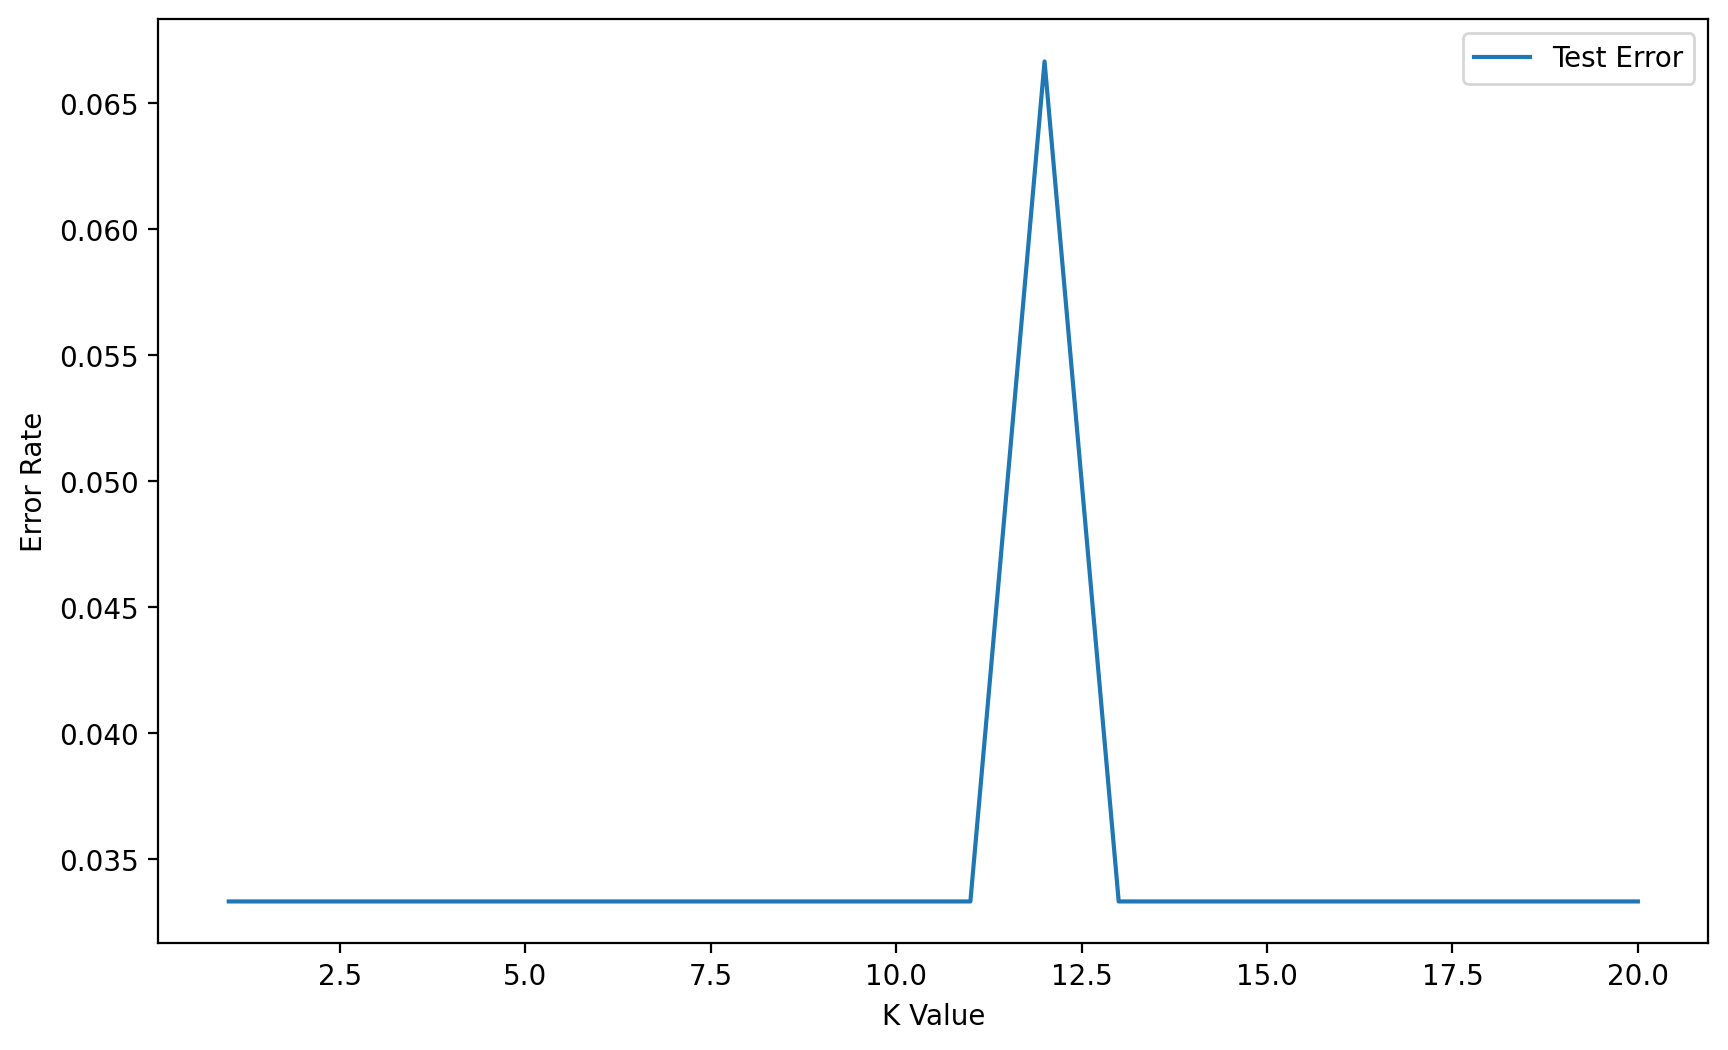

In [34]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),k_value,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [35]:
## KNN for regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df1 = sns.load_dataset('tips')
df1.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [52]:
X = df1.drop('tip', axis=1)
y = df1['tip']

In [53]:

le = LabelEncoder()

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [55]:
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

# fit the model on the training data
model.fit(X_train, y_train)

# predict the species for the test data
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [57]:
X

total_bill  sex  smoker  day  time  size
0         16.99    0       0    2     0     2
1         10.34    1       0    2     0     3
2         21.01    1       0    2     0     3
3         23.68    1       0    2     0     2
4         24.59    0       0    2     0     4
..          ...  ...     ...  ...   ...   ...
239       29.03    1       0    1     0     3
240       27.18    0       1    1     0     2
241       22.67    1       1    1     0     2
242       17.82    1       0    1     0     2
243       18.78    0       0    3     0     2

[244 rows x 6 columns]

In [59]:
df1

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]